1. Kratika Aggarwal 
2. Fall'22

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.preprocessing
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
wine=datasets.load_wine()

In [3]:
data=pd.DataFrame(data=wine['data'], columns=wine['feature_names'])
data['Wine'] = wine['target']+1

In [4]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,1
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,1
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,1
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,1
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,1


### Features

In [5]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'Wine'],
      dtype='object')

### Standardization

In [6]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [7]:
features = data.drop(['Wine'], axis=1)
target = data['Wine']
scaled_f = scale.fit_transform(features)

### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(scaled_f, target, test_size=0.30, random_state=5)

In [9]:
cov_matrix = np.cov(scaled_f.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)

print("Eigenvalues")
print(eigen_vals)
print()
print("Eigenvectors as columns")
print(eigen_vecs)

Eigenvalues
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]

Eigenvectors as columns
[[-0.1443294  -0.48365155 -0.20738262  0.0178563   0.26566365 -0.21353865
  -0.05639636  0.01496997 -0.39613926  0.26628645  0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758 -0.22493093  0.08901289 -0.53689028 -0.03521363 -0.53681385
   0.42052391  0.02596375 -0.06582674 -0.12169604 -0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106 -0.31606881  0.6262239   0.21417556  0.14302547 -0.15447466
  -0.14917061 -0.14121803  0.17026002  0.04962237 -0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041  0.0105905   0.61208035 -0.06085941 -0.06610294  0.10082451
  -0.28696914  0.09168285 -0.42797018  0.05574287  0.20044931  0.47931378
   0.05279942]
 [-0.14199204 -0.299634    0.13075693  0.35179658 -0.72704851 -0.03814394
   0.3228833   0.05677422  0.15636143 -0.06222011  0.27140257  0.07128891
   0.06787022]
 

In [10]:
tot = sum(eigen_vals)
print("\n",tot)
var_exp = [(i / tot)*100 for i in sorted(eigen_vals, reverse=True)]
print("\n\n1. Variance Explained\n",var_exp)
cum_var_exp = np.cumsum(var_exp)
print("\n\n2. Cumulative Variance Explained\n",cum_var_exp)
print("\n\n3. Percentage of variance the first two principal components each contain\n ",var_exp[0:2])
print("\n\n4. Percentage of variance the first two principal components together contain\n",sum(var_exp[0:2]))


 13.073446327683618


1. Variance Explained
 [36.19884809992632, 19.20749025700894, 11.123630536249978, 7.069030182714039, 6.563293679648602, 4.935823319222567, 4.238679322623318, 2.680748948378866, 2.2221534047897116, 1.9300190939440771, 1.736835689989917, 1.2982325756042121, 0.7952148898994532]


2. Cumulative Variance Explained
 [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


3. Percentage of variance the first two principal components each contain
  [36.19884809992632, 19.20749025700894]


4. Percentage of variance the first two principal components together contain
 55.406338356935265


## Variance Plots

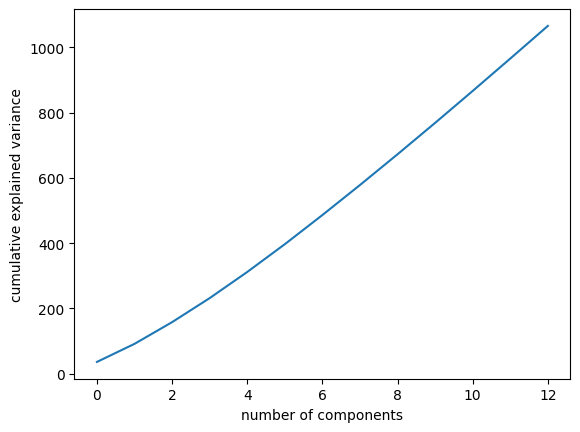

In [11]:
plt.plot(np.cumsum(cum_var_exp))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

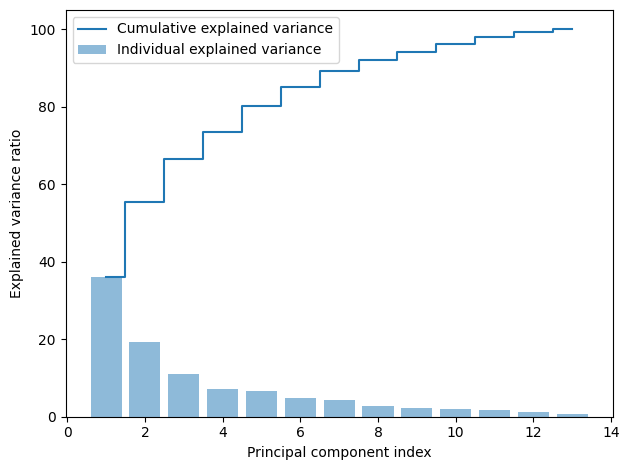

In [12]:
plt.bar(range(1,14), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1,14), cum_var_exp, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

These plots explains that each principal component collectively contributes to the variance of the data. For instance, as the move on from one to other component, each component adds in the overall contribution to the target value. Here the first component affects around 37%, second cumulates the contribution to around 55% and so on. First two principal components adding upto more than 50% tells that they both are the maximum components and thus we decide to reduce all features to just 2 features.

## Eigen Pairs

In [13]:
eigen_p = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]

In [14]:
eigen_p.sort(reverse=True)

## Projection Matrix

In [15]:
W = np.hstack((eigen_p[0][1][:, np.newaxis],
                    eigen_p[1][1][:, np.newaxis]))
print('Projection Matrix W:\n', W)

Projection Matrix W:
 [[-0.1443294  -0.48365155]
 [ 0.24518758 -0.22493093]
 [ 0.00205106 -0.31606881]
 [ 0.23932041  0.0105905 ]
 [-0.14199204 -0.299634  ]
 [-0.39466085 -0.06503951]
 [-0.4229343   0.00335981]
 [ 0.2985331  -0.02877949]
 [-0.31342949 -0.03930172]
 [ 0.0886167  -0.52999567]
 [-0.29671456  0.27923515]
 [-0.37616741  0.16449619]
 [-0.28675223 -0.36490283]]


## Transformation 

In [16]:
x_train_pca = X_train.dot(W)
x_test_pca = X_test.dot(W)

## Scatter Plot

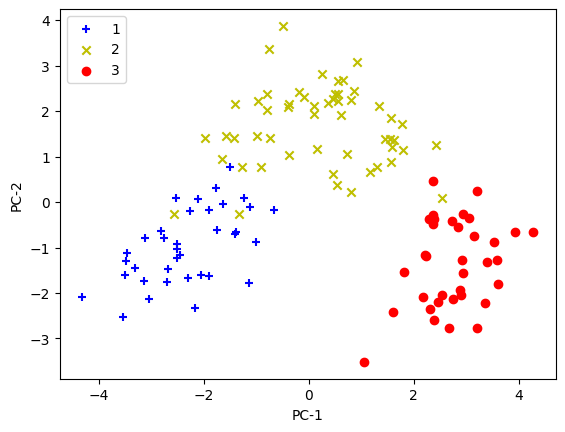

In [17]:
colors = ['b', 'y', 'r']
markers = ['+', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train == l, 0], 
                x_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)
    

plt.xlabel('PC-1')
plt.ylabel('PC-2')
plt.legend(loc='upper left')

plt.show()

## ListedColormap

In [18]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(colors)

## LR Model

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C = 10).fit(x_train_pca, y_train)

## Decision Region

In [20]:
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1

In [21]:
y_train_pred = lr.predict(x_train_pca)
y_test_pred = lr.predict(x_test_pca)

xx_train, yy_train = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                np.arange(y_min, y_max, 0.1))
Z_train = lr.predict(np.c_[xx_train.ravel(), yy_train.ravel()])
Z_train = Z_train.reshape(xx_train.shape)

x_min, x_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1
y_min, y_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1

xx_test, yy_test = np.meshgrid(np.arange(x_min, x_max, 0.1),
                              np.arange(y_min, y_max, 0.1))
Z_test = lr.predict(np.c_[xx_test.ravel(), yy_test.ravel()])
Z_test = Z_test.reshape(xx_test.shape)

## Plot

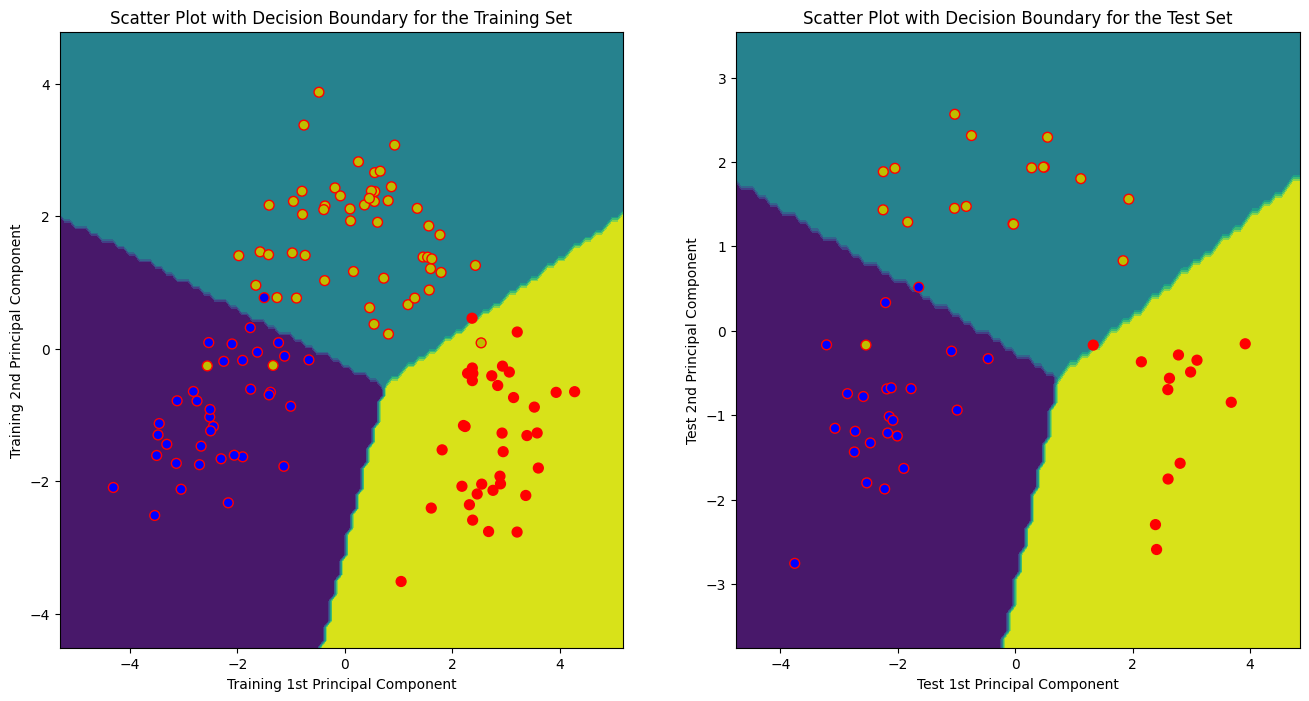

In [22]:
plt.figure(figsize=(16,8))
plt.subplot(1, 2, 1)

plt.contourf(xx_train, yy_train, Z_train)
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c = y_train, s = 50, edgecolor = 'r', cmap=cmap)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Training Set')

plt.subplot(1, 2, 2)

plt.contourf(xx_test, yy_test, Z_test)
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c = y_test, s = 50, edgecolor = 'r', cmap=cmap)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Scatter Plot with Decision Boundary for the Test Set')
plt.show()

All data points seems to effectively classified into three different regions giving us the 3 classified wines in the data.